## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [333]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [334]:
all_data = np.genfromtxt("RegData.csv",delimiter=",")

#### Explore your data

In [335]:
print(all_data)

[[2.9000001  4.        ]
 [6.69999981 7.4000001 ]
 [4.9000001  5.        ]
 [7.9000001  7.19999981]
 [9.80000019 7.9000001 ]
 [6.9000001  6.0999999 ]
 [6.0999999  6.        ]
 [6.19999981 5.80000019]
 [6.         5.19999981]
 [5.0999999  4.19999981]
 [4.69999981 4.        ]
 [4.4000001  4.4000001 ]
 [5.80000019 5.19999981]]


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [336]:
x_values = all_data[:,0]
y_values = all_data[:,1]

#### Explore your data

In [337]:
print(x_values)
print(y_values)

[2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot the original data (scatter plot of X,y)

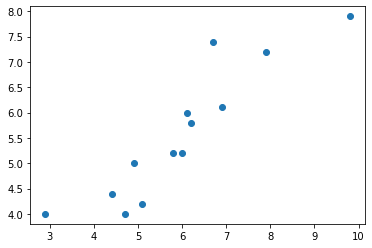

In [338]:
plt.scatter(x_values,y_values)
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

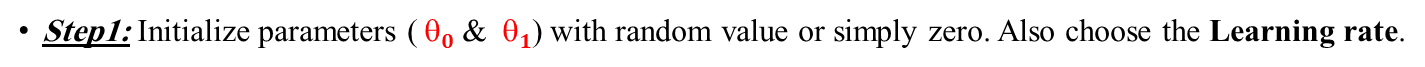

In [339]:
theta0 = 0
theta1 = 0
learning_rate = 0.0001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.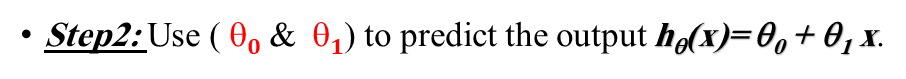
#### Note: you will need to iterate through all data points

In [340]:
def h_x(th0,th1,x_data):
    return th0 + th1 * x_data

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [341]:
def cost_fun (x_data,y_data,th0,th1):
    return (1/2*len(x_data))*sum((h_x(th0,th1,x_data)-y_data)**2)

### Step4: Calculate the gradient.![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [342]:
def gradient_theta0(th0,th1,x_data,y_data):
    return (1/len(x_data))*sum(h_x(th0,th1,x_data)-y_data)

def gradient_theta1(th0,th1,x_data,y_data):
    return (1/len(x_data))*sum((h_x(th0,th1,x_data)-y_data) * x_data)

### Step5: Update the parameters (simultaneously).![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [343]:
def update_theta0 (th0,th1,lrate,x_data,y_data):
    return th0 - (lrate/len(x_data))*sum(h_x(th0,th1,x_data)- y_data)

def update_theta1 (th0,th1,lrate,x_data,y_data):
    return th1 - (lrate/len(x_data))*sum((h_x(th0,th1,x_data)- y_data) * x_data)


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.![image.png](attachment:image.png)

In [344]:
all_costs = []
for i in range(1000):
    theta0 = update_theta0(theta0,theta1,learning_rate,x_values,y_values)
    theta1 = update_theta1(theta0,theta1,learning_rate,x_values,y_values)
    all_costs.append(cost_fun(x_values,y_values,theta0,theta1))

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [345]:
h = h_x(theta0,theta1,x_values)

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

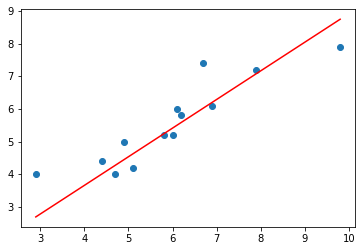

In [346]:
plt.scatter(x_values,y_values)
plt.plot([min(x_values), max(x_values)], [min(h), max(h)], color="red")
plt.show()

#### Use R2 score to evaluate LR equation output
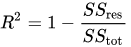
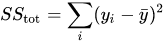
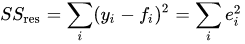
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [347]:
print(r2_score(y_values,h))

0.7396380141157448


## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [348]:
def update_theta0_vectorized (th0,th1,lrate,x_data,y_data):
    return th0 - (lrate/len(x_data))*sum(h_x(th0,th1,x_data)- y_data)

def update_theta1_vectorized (th0,th1,lrate,x_data,y_data):
    return th1 - (lrate/len(x_data))*((h_x(th0,th1,x_data)- y_data) @ x_data)

theta0=0
theta1=0
for i in range(1000):
    theta0 = update_theta0_vectorized(theta0,theta1,learning_rate,x_values,y_values)
    theta1 = update_theta1_vectorized(theta0,theta1,learning_rate,x_values,y_values)

h= h_x(theta0,theta1,x_values)
print(r2_score(y_values,h))


0.7396380141157448


#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

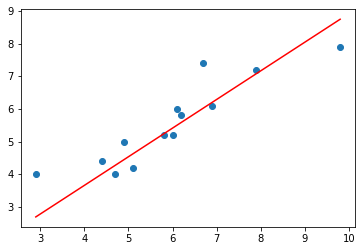

In [349]:
plt.scatter(x_values,y_values)
plt.plot([min(x_values), max(x_values)], [min(h), max(h)], color="red")
plt.show()


In [350]:
print(r2_score(y_values,h))

0.7396380141157448


### Plot loss vs. iterations

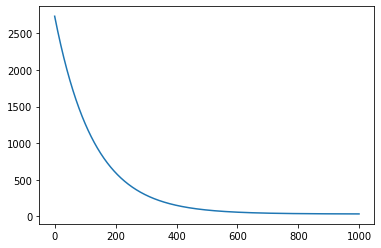

In [351]:
plt.plot(list(range(1000)), all_costs)
plt.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [352]:
all_data = np.genfromtxt("MultipleLR.csv", delimiter=",")
x_all_data = all_data[:,:-1]
x_all_data = np.insert(x_all_data,0,np.ones(x_all_data.shape[0]),axis=1)
y_all_data = all_data[:,-1]
thetas = np.zeros(all_data.shape[1])

In [353]:
print(all_data)
print(x_all_data)
print(y_all_data)
print(thetas)

[[ 73.  80.  75. 152.]
 [ 93.  88.  93. 185.]
 [ 89.  91.  90. 180.]
 [ 96.  98. 100. 196.]
 [ 73.  66.  70. 142.]
 [ 53.  46.  55. 101.]
 [ 69.  74.  77. 149.]
 [ 47.  56.  60. 115.]
 [ 87.  79.  90. 175.]
 [ 79.  70.  88. 164.]
 [ 69.  70.  73. 141.]
 [ 70.  65.  74. 141.]
 [ 93.  95.  91. 184.]
 [ 79.  80.  73. 152.]
 [ 70.  73.  78. 148.]
 [ 93.  89.  96. 192.]
 [ 78.  75.  68. 147.]
 [ 81.  90.  93. 183.]
 [ 88.  92.  86. 177.]
 [ 78.  83.  77. 159.]
 [ 82.  86.  90. 177.]
 [ 86.  82.  89. 175.]
 [ 78.  83.  85. 175.]
 [ 76.  83.  71. 149.]
 [ 96.  93.  95. 192.]]
[[  1.  73.  80.  75.]
 [  1.  93.  88.  93.]
 [  1.  89.  91.  90.]
 [  1.  96.  98. 100.]
 [  1.  73.  66.  70.]
 [  1.  53.  46.  55.]
 [  1.  69.  74.  77.]
 [  1.  47.  56.  60.]
 [  1.  87.  79.  90.]
 [  1.  79.  70.  88.]
 [  1.  69.  70.  73.]
 [  1.  70.  65.  74.]
 [  1.  93.  95.  91.]
 [  1.  79.  80.  73.]
 [  1.  70.  73.  78.]
 [  1.  93.  89.  96.]
 [  1.  78.  75.  68.]
 [  1.  81.  90.  93.]
 [  1.  88

In [354]:
print(all_data.shape)
print(x_all_data.shape)
print(y_all_data.shape)
print(thetas.shape)

(25, 4)
(25, 4)
(25,)
(4,)


### Repeat your implementation but for more than one variable

In [355]:
def h_data(th,x_data):
    return x_data @ th

def update_thetas (th,lrate,x_data,y_data):
    return th - (lrate/len(x_data[:,0]))*(x_data.T @(h_data(thetas,x_data)- y_data))

def data_loss(x_data,y_data,th):
    return (1/len(x_data[:,0]))*sum((h_data(th,x_data)- y_data)**2)

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [356]:
data_all_loss = []
for i in range(1000):
    thetas = update_thetas(thetas,learning_rate,x_all_data,y_all_data)
    data_all_loss.append(data_loss(x_all_data,y_all_data,thetas))

h = h_data(thetas,x_all_data)

### Plot loss vs. iterations

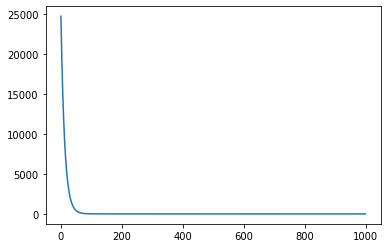

In [357]:
plt.plot(list(range(1000)), data_all_loss)
plt.show()


#### Use R2 score to evaluate LR equation output

In [358]:
print(r2_score(y_all_data, h))


0.9886850607889688


# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

#### Train the model (fit the model to the training data)

In [359]:
x_values= x_values.reshape(-1,1)
model = LinearRegression().fit(x_values,y_values)


#### Predict y values using the trained model

In [360]:
y_pred = model.predict(x_values)

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

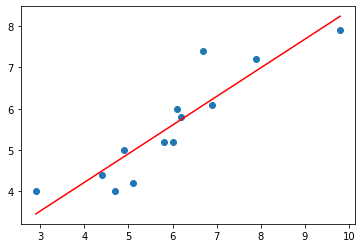

In [361]:
plt.scatter(x_values,y_values)
plt.plot([min(x_values), max(x_values)], [min(y_pred), max(y_pred)], color="red")
plt.show()

#### Use R2 score to evaluate model output

In [362]:
print(r2_score(y_values,y_pred))

0.8213156778363777


### Repeat for Mulivariate

In [363]:
model2 = LinearRegression().fit(x_all_data,y_all_data)

In [364]:
prd = model2.predict(x_all_data)

In [365]:
print(r2_score(y_all_data,prd))


0.9896615789448399
